In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

df = pd.read_csv("adult.csv")

In [2]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
xdata=df.drop("income", axis = 1)
ydata=df["income"]

In [7]:
ydata.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

In [9]:
for x in xdata.columns:
    if xdata[x].dtype == 'object':
        lab.fit(list(xdata[x].values))
        xdata[x] = lab.transform(list(xdata[x].values))

In [10]:
xdata.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39
2,66,0,186061,15,10,6,0,4,2,0,0,4356,40,39
3,54,4,140359,5,4,0,7,4,4,0,0,3900,40,39
4,41,4,264663,15,10,5,10,3,4,0,0,3900,40,39


In [11]:
ydata.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

In [12]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [13]:
dt.fit(xdata,ydata)

DecisionTreeClassifier()

In [14]:
dt.predict([[90,0,77053,11,9,6,0,1,4,0,0,4356,40,39]])

C:\Users\masip\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['<=50K'], dtype=object)

In [15]:
from sklearn import tree 

[Text(0.7115848642278052, 0.9891304347826086, 'X[7] <= 0.5\ngini = 0.366\nsamples = 32561\nvalue = [24720, 7841]'),
 Text(0.4830373395244331, 0.967391304347826, 'X[4] <= 12.5\ngini = 0.495\nsamples = 13193\nvalue = [7275, 5918]'),
 Text(0.332740865453982, 0.9456521739130435, 'X[10] <= 5095.5\ngini = 0.442\nsamples = 9224\nvalue = [6178, 3046]'),
 Text(0.18852349865494067, 0.9239130434782609, 'X[4] <= 8.5\ngini = 0.417\nsamples = 8766\nvalue = [6170, 2596]'),
 Text(0.041915623069252506, 0.9021739130434783, 'X[11] <= 1791.5\ngini = 0.186\nsamples = 1459\nvalue = [1308, 151]'),
 Text(0.025027491856788507, 0.8804347826086957, 'X[0] <= 36.5\ngini = 0.173\nsamples = 1428\nvalue = [1291, 137]'),
 Text(0.0065872561579487735, 0.8586956521739131, 'X[12] <= 49.0\ngini = 0.082\nsamples = 398\nvalue = [381, 17]'),
 Text(0.004088641753209584, 0.8369565217391305, 'X[4] <= 7.5\ngini = 0.059\nsamples = 329\nvalue = [319, 10]'),
 Text(0.001780830630286841, 0.8152173913043478, 'X[13] <= 1.0\ngini = 0.045

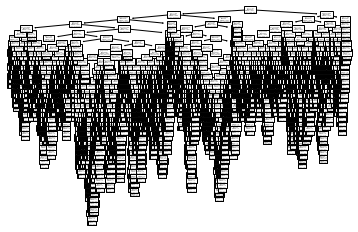

In [16]:
tree.plot_tree(dt)

[Text(0.7115848642278052, 0.9891304347826086, 'X[7] <= 0.5\ngini = 0.366\nsamples = 32561\nvalue = [24720, 7841]'),
 Text(0.4830373395244331, 0.967391304347826, 'X[4] <= 12.5\ngini = 0.495\nsamples = 13193\nvalue = [7275, 5918]'),
 Text(0.332740865453982, 0.9456521739130435, 'X[10] <= 5095.5\ngini = 0.442\nsamples = 9224\nvalue = [6178, 3046]'),
 Text(0.18852349865494067, 0.9239130434782609, 'X[4] <= 8.5\ngini = 0.417\nsamples = 8766\nvalue = [6170, 2596]'),
 Text(0.041915623069252506, 0.9021739130434783, 'X[11] <= 1791.5\ngini = 0.186\nsamples = 1459\nvalue = [1308, 151]'),
 Text(0.025027491856788507, 0.8804347826086957, 'X[0] <= 36.5\ngini = 0.173\nsamples = 1428\nvalue = [1291, 137]'),
 Text(0.0065872561579487735, 0.8586956521739131, 'X[12] <= 49.0\ngini = 0.082\nsamples = 398\nvalue = [381, 17]'),
 Text(0.004088641753209584, 0.8369565217391305, 'X[4] <= 7.5\ngini = 0.059\nsamples = 329\nvalue = [319, 10]'),
 Text(0.001780830630286841, 0.8152173913043478, 'X[13] <= 1.0\ngini = 0.045

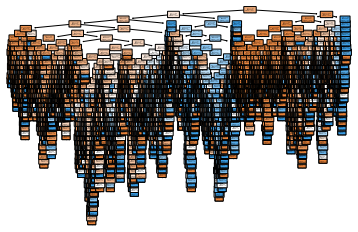

In [17]:
tree.plot_tree(dt, rounded = True, filled = True)

<Figure size 432x288 with 0 Axes>